In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import sgld_tf

Instructions for updating:
Use the retry module or similar alternatives.


In [5]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
directory = '/tmp/tf/distrib_sgld/'
name = 'model.ckpt-101'

In [28]:
ha, data = sgld_tf.aggregate_predictions(directory, sgld_tf.ordered_chkpoints_from_dir(directory)[-100:], 
                             train_data, train_labels, eval_data, eval_labels, "sgld");

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tf/distrib_sgld/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 10, '_save_checkpoints_secs': None, '_session_config': None, '_keep_checkpoint_max': 100, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f49401a3080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tf/distrib_sgld/model.ckpt-9020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

In [30]:
np.array(data).shape

(100, 10000)

In [18]:
data = np.array(data)

In [31]:
sgld_tf.mess(data, 20)

/home/henripal/projects/sgld_tf/sgld_tf/utils.py:53: RuntimeWarning: divide by zero encountered in log
  log_stdevs = np.sum(np.log(stdevs)) / p
/home/henripal/projects/sgld_tf/sgld_tf/utils.py:54: RuntimeWarning: divide by zero encountered in log
  log_bstdevs = np.sum(np.log(batch_stdevs)) / p


0.0

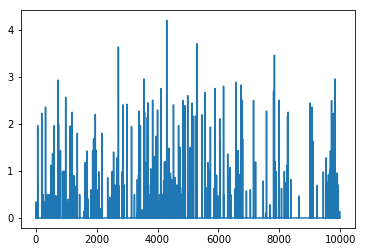

In [40]:
plt.plot(np.std(data, axis=0))

In [41]:
data.shape

(100, 10000)

In [43]:
np.mean(np.std(data, axis=0) == 0)

0.97409999999999997